In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

##  Dataset Overview

### Exploratory Data Analysis (EDA)

### <span style="color:#87CEEB; font-weight:bold"> Step 1: Load the Dataset
#### <span style="color:#87CEEB; font-weight:bold"> Objective: Load the dataset into a Pandas DataFrame for exploration.

In [4]:

## Charger le jeu de données
data = pd.read_csv(r"C:\Users\marti\Desktop\dataof\Fraude_Detection\data\creditcard_2023.csv")

# Afficher les informations de base
print("Dataset Shape:", data.shape)
data.head()


Dataset Shape: (568630, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### <span style="color:#87CEEB; font-weight:bold"> Step 2: Display DataFrame Information
####  <span style="color:#87CEEB; font-weight:bold"> Objective: Display a summary of the DataFrame, including the number of non-null values and the data types of each column.

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

### <span style="color:#87CEEB; font-weight:bold"> Step 3: Visualize the distribution of classes
#### <span style="color:#87CEEB; font-weight:bold"> Objective: Display a bar plot of the distribution of different classes in the 'Class' column of the DataFrame.

C:\Users\marti\AppData\Local\Temp\ipykernel_22080\2042428486.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='Set1')


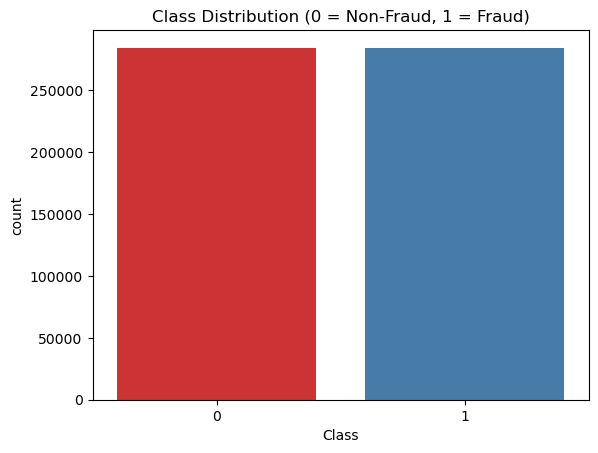

In [26]:
sns.countplot(x='Class', data=data, palette='Set1')
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()

### <span style="color:#87CEEB; font-weight:bold"> Step 4: Statistical summary of the data
#### <span style="color:#87CEEB; font-weight:bold"> Objective: Display a statistical summary of the numerical columns in the DataFrame, including mean, standard deviation, min, max, and quartiles.

In [7]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


### <span style="color:#87CEEB; font-weight:bold"> Step 5: Separate fraudulent and non-fraudulent data
#### <span style="color:#87CEEB; font-weight:bold"> Objective: Create two DataFrames, one containing only fraudulent transactions ('Class' = 1) and the other containing non-fraudulent transactions ('Class' = 0).

In [9]:
fraud_df = data[data['Class'] == 1]
non_fraud_df = data[data['Class'] == 0]

### <span style="color:#87CEEB; font-weight:bold">  Step 6: Visualize the distribution of fraudulent transaction amounts
### <span style="color:#87CEEB; font-weight:bold"> Objective: Display a histogram of fraudulent transaction amounts, with a density curve, using 50 bins for better visualization.

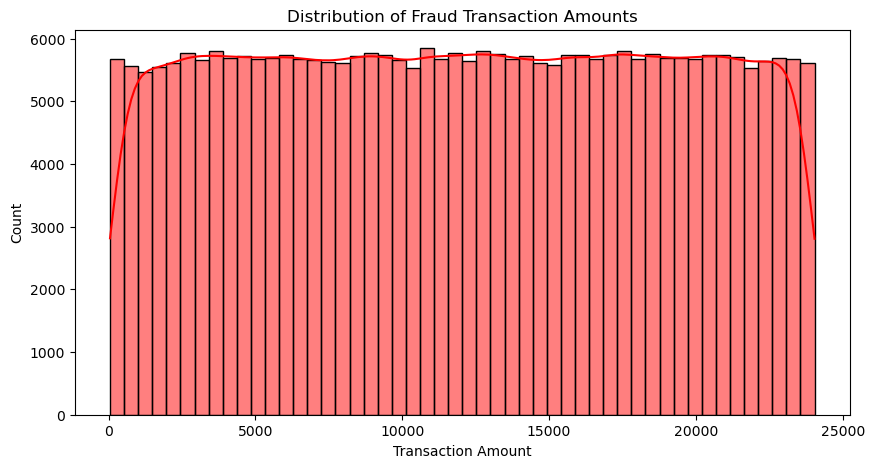

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(fraud_df['Amount'], bins=50, color='red', kde=True)
plt.title('Distribution of Fraud Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.show()

### <span style="color:#87CEEB; font-weight:bold"> Step 7: Visualize the distribution of non-fraudulent transaction amounts
#### <span style="color:#87CEEB; font-weight:bold"> Objective: Display a histogram of non-fraudulent transaction amounts, with a density curve, using 50 bins for better visualization.

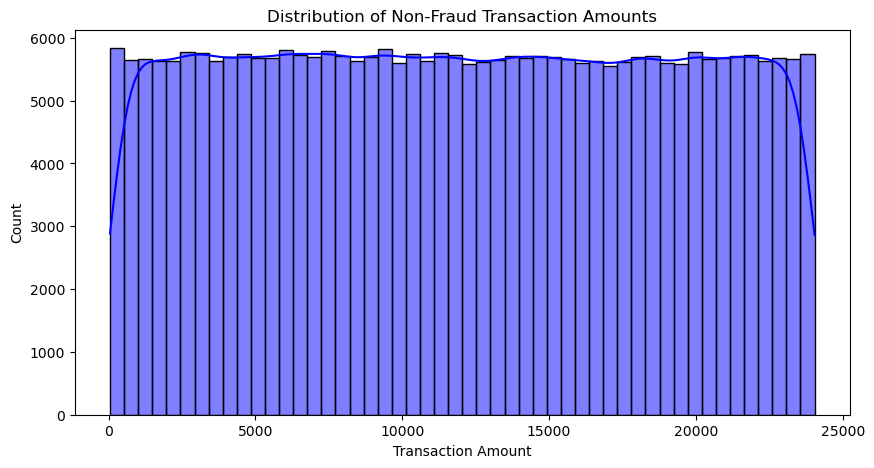

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(non_fraud_df['Amount'], bins=50, color='blue', kde=True)
plt.title('Distribution of Non-Fraud Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.show()

### <span style="color:#87CEEB; font-weight:bold">  Step 8: Calculation of the correlation of all data with the target label 'Class'.
#### <span style="color:#87CEEB; font-weight:bold"> Objective: A table containing the correlations between each feature and the target variable Class. This makes it easy to identify the variables to keep (those with significant correlations) or exclude (those with weak correlations close to 0).

## Understanding the values:

##### Correlation coefficients indicate the strength and direction of the relationship between two variables. They range between -1 and 1:
##### 1: Perfect positive correlation (when one variable increases, the other always increases).
##### 0: No correlation (the variables are not related).
##### -1: Perfect negative correlation (when one variable increases, the other always decreases).
### Interpretation of the results:

#### Variables strongly positively correlated:

##### V4 (0.735981), and V11 (0.724278) show significant positive relationships with the target variable Class.
##### These variables seem to be the most predictive for Class in a model.

#### Variables weakly positively correlated:

##### From V2 (0.491878) to Amount (0.002261), the relationships are positive but less significant.
##### These variables might have an impact but contribute less. 

#### Variables weakly negatively correlated:

##### From V15 (-0.037948) to V14 (-0.805669), the correlations are negative. Variables such as V12 (-0.768579) and V14 (-0.805669) have the strongest negative correlations.
##### This means that as these variables increase, the likelihood or value of Class decreases.

#### Practical applications:

##### The most relevant variables (positively or negatively) are those with values close to 1 or -1. You could prioritize using the following variables:

### Positive: V4, V11.
### Negative: V12, V14, V3.
##### Variables with correlations close to zero (e.g., V22 or Amount) could potentially be excluded during dimensionality reduction, unless they hold specific contextual importance.

In [27]:

correlations = data.corr()['Class'].sort_values(ascending=False)
print(correlations)


Class     1.000000
id        0.864283
V4        0.735981
V11       0.724278
V2        0.491878
V19       0.244081
V27       0.214002
V20       0.179851
V8        0.144294
V21       0.109640
V28       0.102024
V26       0.071052
V25       0.061847
V22       0.014098
V23       0.010255
Amount    0.002261
V15      -0.037948
V13      -0.071105
V24      -0.130107
V5       -0.338639
V18      -0.410091
V6       -0.435088
V17      -0.476377
V7       -0.491234
V1       -0.505761
V16      -0.573511
V9       -0.585522
V10      -0.673665
V3       -0.682095
V12      -0.768579
V14      -0.805669
Name: Class, dtype: float64


### <span style="color:#87CEEB; font-weight:bold"> Step 9: Visualize the correlation matrix
#### <span style="color:#87CEEB; font-weight:bold"> Objective: Display a heatmap representing the correlation between the different variables in the DataFrame.
#### This visualization helps to identify relationships between features, which is useful for understanding how variables interact with each other.
#### For example, if certain variables are strongly correlated, it might suggest a relationship or redundancy between them, which can impact the machine learning model.

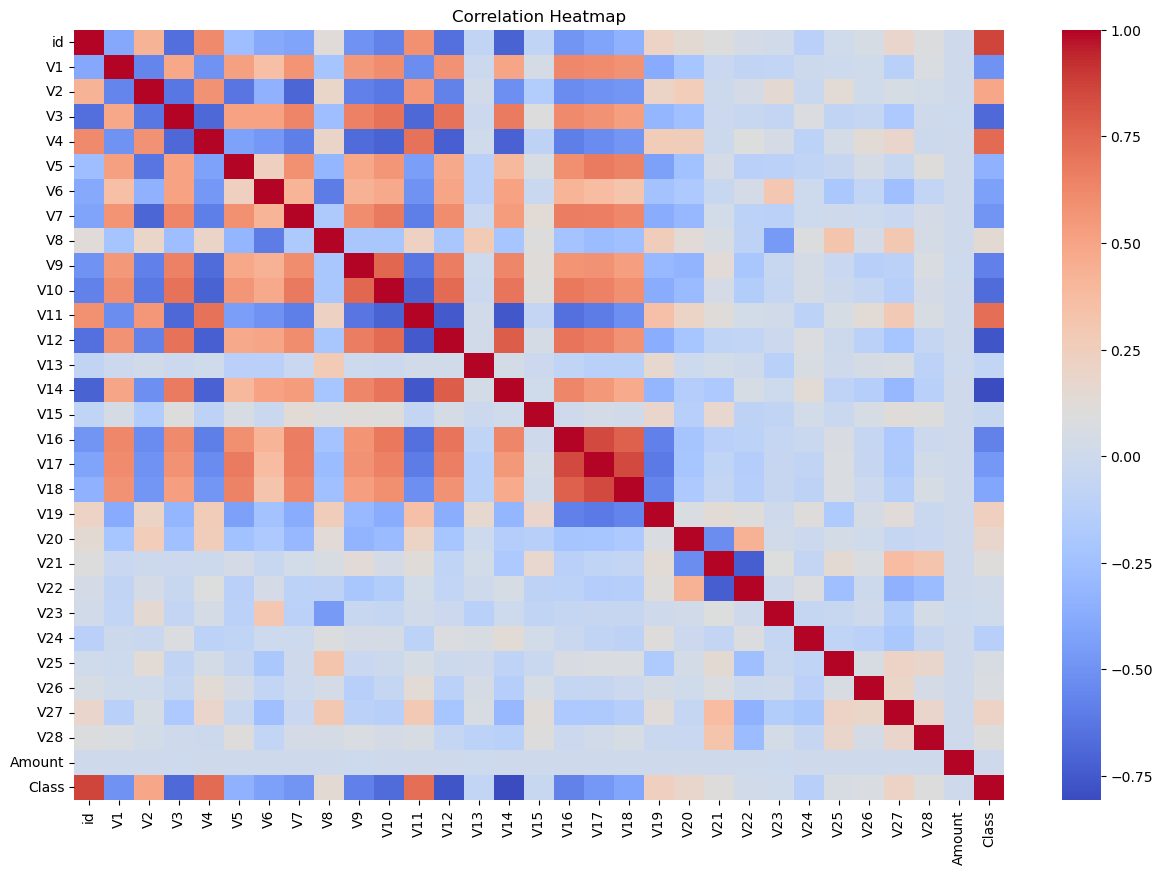

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

### <span style="color:#87CEEB; font-weight:bold"> Step 10: Visualize the correlation matrix for fraudulent transactions
#### <span style="color:#87CEEB; font-weight:bold">  Objective: Display a heatmap representing the correlation between the different variables in the fraudulent transactions DataFrame.
#### This visualization helps to better understand the relationships between the features specific to fraudulent transactions, which can be useful for identifying key variables that contribute to fraud.
#### A high correlation between certain variables may suggest they share a strong relationship and could influence fraud detection.

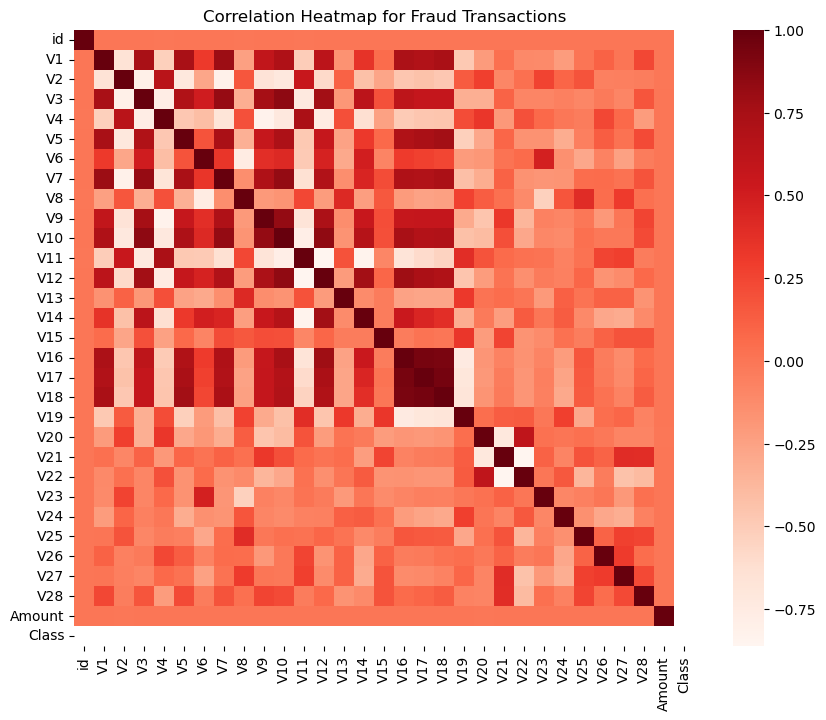

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(fraud_df.corr(), cmap='Reds', annot=False)
plt.title('Correlation Heatmap for Fraud Transactions')
plt.show()

### <span style="color:#87CEEB; font-weight:bold"> Step 11: Visualize the correlation matrix for non-fraudulent transactions
#### <span style="color:#87CEEB; font-weight:bold"> Objective: Display a heatmap representing the correlation between the different variables in the non-fraudulent transactions DataFrame.
#### This visualization helps to better understand the relationships between the features of non-fraudulent transactions and identify important trends or variables that are not related to fraud.
#### Analyzing correlations for non-fraudulent transactions helps distinguish differences compared to fraudulent transactions, which can better prepare models for fraud detection.

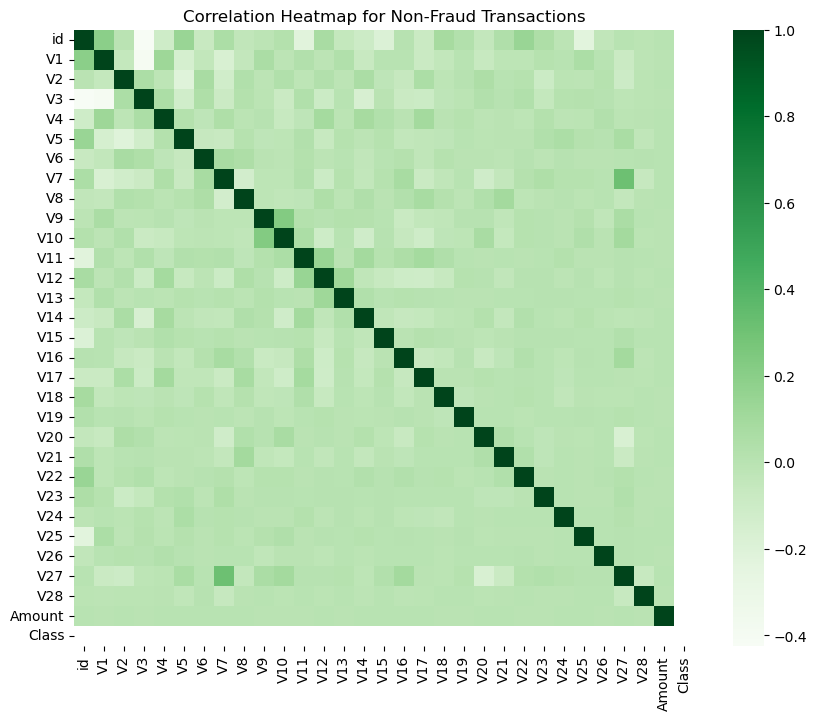

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(non_fraud_df.corr(), cmap='Greens', annot=False)
plt.title('Correlation Heatmap for Non-Fraud Transactions')
plt.show()

### <span style="color:#87CEEB; font-weight:bold"> Step 12: Check for missing values in the DataFrame
#### <span style="color:#87CEEB; font-weight:bold"> Objective: Display the number of missing values for each column in the DataFrame.
#### This step helps identify columns with missing data, which is crucial for deciding what actions to take before analysis or model training.

In [16]:
print(data.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### <span style="color:#87CEEB; font-weight:bold"> Step 13: Visualize the distribution of transaction amounts with a boxplot
#### <span style="color:#87CEEB; font-weight:bold">  Objective: Display a boxplot of transaction amounts to detect outliers and understand the distribution of the data.
#### A boxplot allows visualization of the median, quartiles, and potential extreme values (outliers) in the transaction amounts.

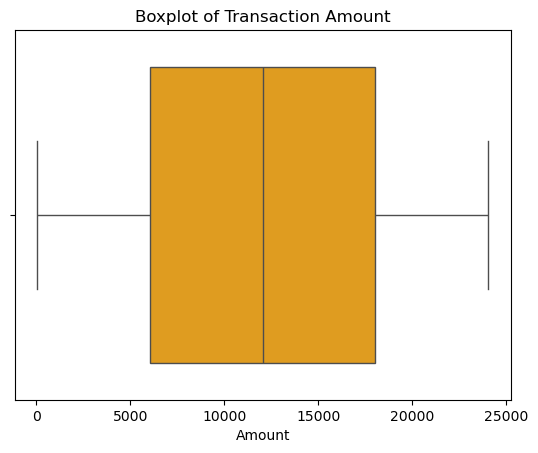

In [17]:
sns.boxplot(x=data['Amount'], color='orange')
plt.title('Boxplot of Transaction Amount')
plt.show()

### <span style="color:#87CEEB; font-weight:bold"> Step 14: Visualize the distribution of principal features (PCA components)
#### <span style="color:#87CEEB; font-weight:bold">  Objective: Display the distribution of selected features (V1 to V5, V26 to V28) using kernel density estimation (KDE) plots for each variable.
#### KDE plots allow visualizing the distribution of each feature, giving an idea of its shape (e.g., whether it follows a normal distribution or not).
#### This is especially useful for understanding the distribution of principal components from PCA (Principal Component Analysis) and detecting unusual behaviors or anomalies.

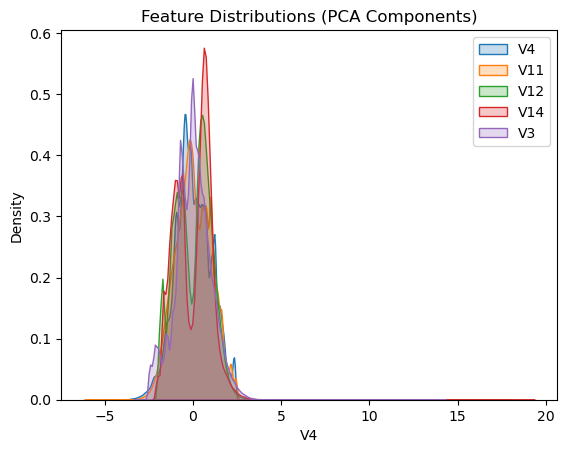

In [28]:
for col in ['V4', 'V11', 'V12', 'V14', 'V3']:
    sns.kdeplot(data[col], fill=True, label=col)
plt.title('Feature Distributions (PCA Components)')
plt.legend()
plt.show()

### <span style="color:#87CEEB; font-weight:bold"> Step 15: Visualize relationships between features for fraudulent transactions
#### <span style="color:#87CEEB; font-weight:bold"> Objective: Display a pairplot of a random sample from fraudulent transactions, selecting specific variables ('V4', 'V11', 'V12', 'V14','V3').
#### The pairplot allows visualizing the relationships between all pairs of selected variables. The diagonal plots show KDE curves for each feature to observe their distribution.
#### The `hue='Class'` argument is used to color the points based on the class (fraudulent or non-fraudulent), while the `palette={1: 'red'}` argument colors the fraudulent transactions in red.


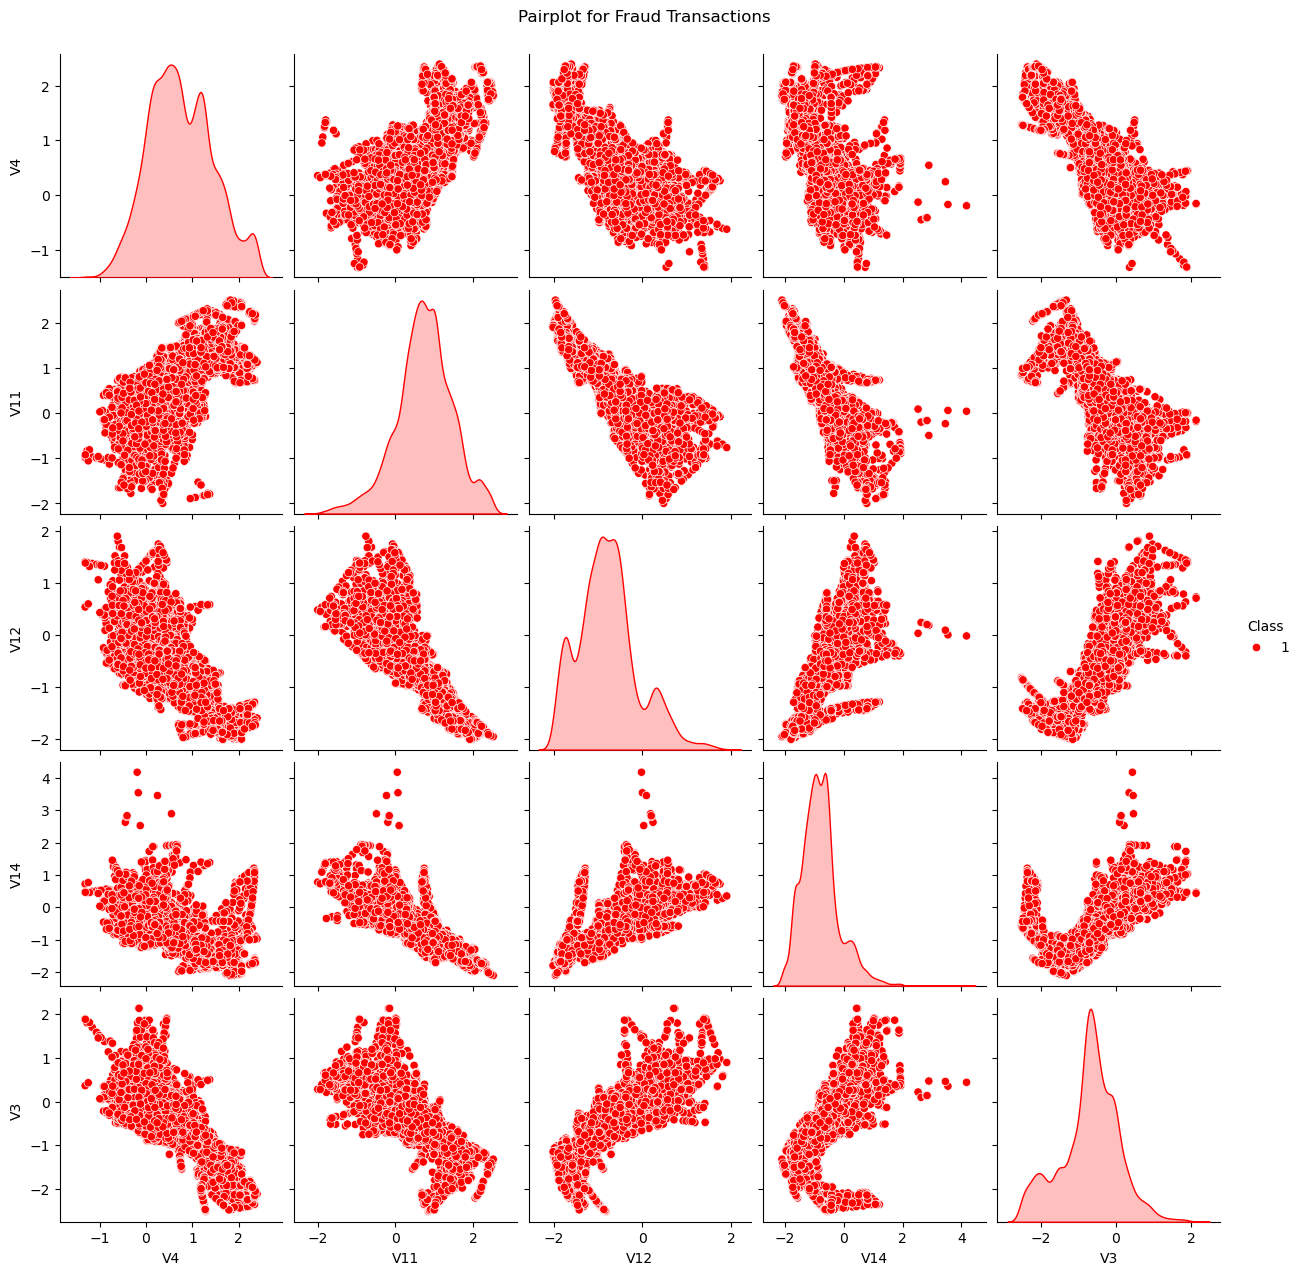

In [34]:
sns.pairplot(fraud_df.sample(10000), vars=['V4', 'V11', 'V12', 'V14','V3'], diag_kind='kde', hue='Class', palette={1: 'red'})
plt.suptitle('Pairplot for Fraud Transactions', y=1.02)
plt.show()

### <span style="color:#87CEEB; font-weight:bold"> Step 16: Visualize relationships between features for non-fraudulent transactions
#### <span style="color:#87CEEB; font-weight:bold"> Objective: Display a pairplot of a random sample from non-fraudulent transactions, selecting specific variables ('V4', 'V11', 'V12', 'V14','V3').
#### The pairplot allows visualizing the relationships between all pairs of selected variables. The diagonal plots show KDE curves for each feature to observe their distribution.
#### The `hue='Class'` argument is used to color the points based on the class (fraudulent or non-fraudulent), while the `palette={0: 'green'}` argument colors the non-fraudulent transactions in green.

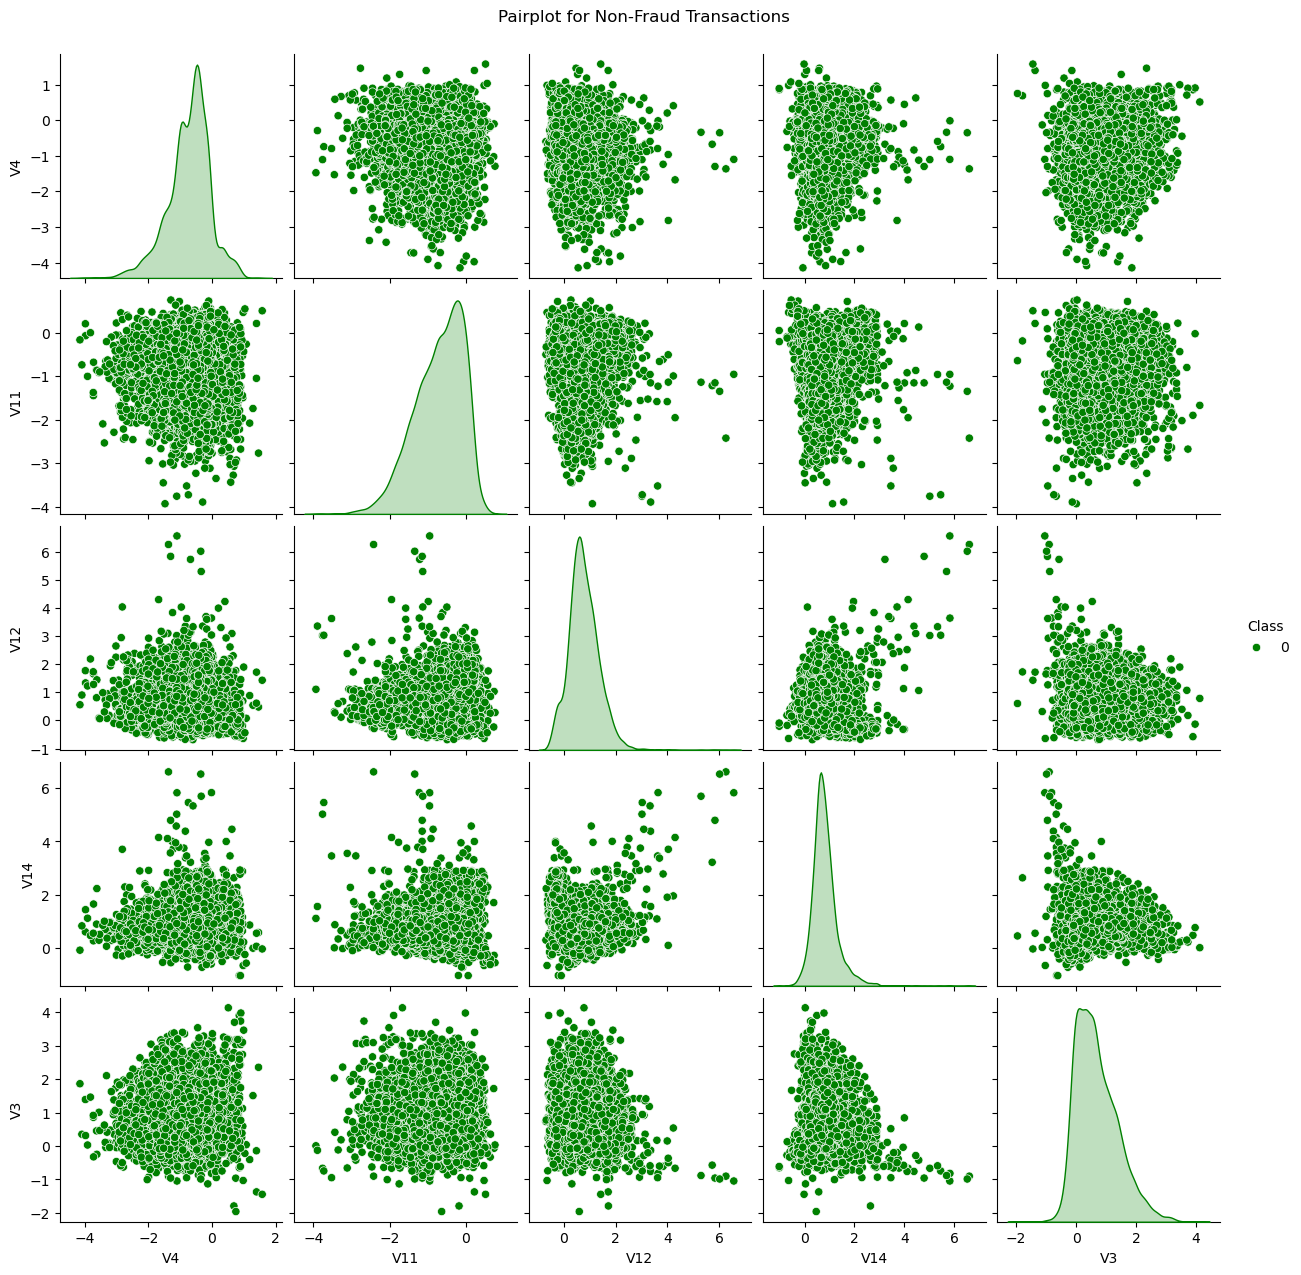

In [33]:
sns.pairplot(non_fraud_df.sample(10000), vars=['V4', 'V11', 'V12', 'V14','V3'], diag_kind='kde', hue='Class', palette={0: 'green'})
plt.suptitle('Pairplot for Non-Fraud Transactions', y=1.02)
plt.show()

### <span style="color:#87CEEB; font-weight:bold"> Step 17: Check data types and unique value counts
#### <span style="color:#87CEEB; font-weight:bold"> Objective: Display the data types of each column in the DataFrame to ensure each variable is properly formatted (e.g., numerical, categorical, etc.).
#### This also helps identify if any columns require further processing, such as type conversion or encoding of categorical variables.
#### Then, we print the number of unique values in each column to get an overview of the diversity of data in each feature.
#### This is useful for identifying columns with low variation (e.g., a single unique value) that might not provide meaningful information for the model.

In [21]:
print(data.dtypes)
print("\nUnique Value Counts:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()}")

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Unique Value Counts:
id: 568630
V1: 552035
V2: 552035
V3: 552035
V4: 552035
V5: 552035
V6: 552035
V7: 552035
V8: 552035
V9: 552035
V10: 552035
V11: 552035
V12: 552035
V13: 552035
V14: 552035
V15: 552035
V16: 552035
V17: 552035
V18: 552035
V19: 552035
V20: 552035
V21: 552035
V22: 552035
V23: 552035
V24: 552035
V25: 552035
V26: 552035
V27: 552035
V28: 552035
Amount: 506485
Class: 2


### <span style="color:#87CEEB; font-weight:bold"> Step 18: Visualize fraud vs non-fraud transactions with a scatterplot
#### <span style="color:#87CEEB; font-weight:bold"> Objective: Display a scatterplot showing the relationship between 'id' and 'Amount' for fraudulent and non-fraudulent transactions.
#### Fraudulent transactions are shown in red, while non-fraudulent transactions are displayed in blue with reduced opacity (`alpha=0.3`) to better visualize the density of non-fraudulent points.
#### This plot helps visualize how transaction amounts vary based on the 'id' and if there are any visible patterns between the two categories of transactions.
#### Result: A plot showing the distribution of fraudulent and non-fraudulent transactions, helping to visually analyze the differences between them.

c:\Users\marti\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


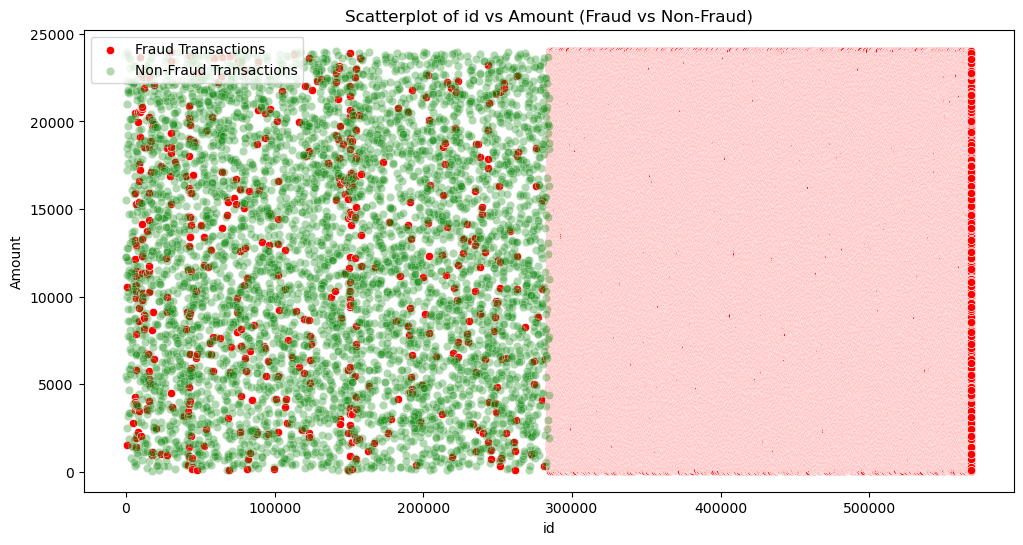

In [35]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=fraud_df, x='id', y='Amount', color='red', label='Fraud Transactions')
sns.scatterplot(data=non_fraud_df.sample(5000), x='id', y='Amount', color='green', alpha=0.3, label='Non-Fraud Transactions')
plt.title('Scatterplot of id vs Amount (Fraud vs Non-Fraud)')
plt.legend()
plt.show()


### <span style="color:#87CEEB; font-weight:bold"> Step 19: Calculate the average amount by class (fraudulent vs non-fraudulent)
#### <span style="color:#87CEEB; font-weight:bold"> Objective: Calculate the mean transaction amount for each class (fraudulent or non-fraudulent) to compare the average values.
#### By grouping the data by the 'Class' column, we can compute the average transaction amounts for each category.

In [23]:
avg_amount_by_class = data.groupby('Class')['Amount'].mean()
print(avg_amount_by_class)

Class
0    12026.313506
1    12057.601763
Name: Amount, dtype: float64


## <span style="color:#87CEEB; font-weight:bold"> Data Preprocessing